# Credit Card Approval Prediction
## Introduction

The bank's credit card department is a leading user of data science, with a strong focus on acquiring new credit card customers. To manage risk, they employ a data-driven credit assessment system known as Credit Scoring. This system, referred to as an application scorecard, determines a credit card application's approval by evaluating the applicant's creditworthiness and risk level. Applicants submit forms physically or online, providing data used alongside Credit Bureau Scores (e.g., FICO or CIBIL) and internal information for decision-making. The bank is also integrating external data to improve credit evaluations.

## Objectives:

The primary goals of this assignment are to reduce risk and increase bank profit. In order to reduce loss from the bank's perspective, the bank must make a judgment based on the applicant's profile. When deciding whether to approve or deny a credit card application, the bank takes into account the applicants' work environment, income level, and family orientation. the client Many features are present in credit card data, and a classification method is used to determine an applicant's creditworthiness.
In this project, we're using exploratory data analysis (EDA) as a way of data exploration to learn new things, find new relationships, put new ideas into practice, and identify patterns in the data. It is crucial to use the justification required for each stage.


## Features names: 
#### 1.(Credit_Card.csv)

| Features | Values |
| --------- | ------ |
| Ind_ID | Client ID |
| Approval_status | 0 is application approved and 1 is application rejected |
| Gender | Gender information |
| Car_owner | Having car or not |
| Propert_owner | Having property or not |
| Children | Count of children |
| Annual_income | Annual income |
| Type_Income | Income type |
| Education | Education level |
| Marital_status | Marital_status |
| Housing_type | Living style |
| Birthday_count | Use backward count from current day (0), -1 means yesterday |
| Employed_days | Start date of employment. Use backward count from current day (0).                                            Positive value means, individual is currently unemployed |
| Mobile_phone | Any mobile phone |
| Work_phone | Any work phone |
| Phone | Any phone number |
| EMAIL_ID | Any email ID |
| Type_Occupation | Occupation |
| Family_Members | Family size |

#### 2.(Credit_card_label.csv) 
| Features | Values |
|----------|---------|
| ID  | The joining key between application data and credit status data, same     is Ind_ID  | 
| Label  | 0 is application approved and 1 is application rejected  |






In [1]:

# Warning is used to supress the display of warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

# Matplotlib, seaborn is used for visualization 
import matplotlib.pyplot as plt
import seaborn as sns

# To encode the variables
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Model Selection used for splitting the dataset into train and test
from sklearn.model_selection import train_test_split

# StandardScaler used to Standardize the all the variables
from sklearn.preprocessing import StandardScaler 

# Scikit - Learn features various Models and metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV #Hyperparameter Tuning
from sklearn.model_selection import cross_val_score #cross validation score

#### Independent and dependent features are present in two diffrent dataset 

In [2]:
df1=pd.read_csv('D:\\jupyter\\dataset\\capstone\\Credit_card.csv') #1. dataset 
df2=pd.read_csv('D:\\jupyter\\dataset\\capstone\\Credit_card_label.csv') #2. dataset 

#### Megering two dataset  on  column  Int_ID

In [3]:
df=pd.merge(df1,df2,on='Ind_ID',how='left') # Merging two dataset 

In [4]:
df3=df.copy() # # making a deep copy of the original credit card dataset

In [5]:
df3.head() #Fist 5 rows of the dataset 

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [6]:
df3.tail() #Last 5 rows of the dataset

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,0
1547,5053790,F,Y,Y,0,225000.0,Working,Higher education,Married,House / apartment,-16601.0,-2859,1,0,0,0,NaN,2,0


By seeing first and last 5 rows of the dataset ,Understand that  dataset contains the null values , it should be handle based on requirement and percentage of null values 

In [7]:
df3.shape

(1548, 19)

Dataset consists of 1548 rows and 19 columns 

In [8]:
df3.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members',
       'label'],
      dtype='object')

In [9]:
df3.info() # Checking for all the details about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In this dataset there are 11 numerical variables and 8 categorical variables.howevere few columns are not normal.
> 1. "Birthday_count" column is about the no of days from the day of birth .
> 2. "Employed_days" column is about the no of days employee worked.-ve values are no of days employed and +ve values are no of days unemployed

### Data Correction :

In label column Approval is 0 and Rejected is 1 .label column is renamed as status and values chnaged as .

> 1. The value 1 as Approval
> 2. The value 0 as Rejected

The All columns are in diffrent cases for the easy access all columns converted in lower case  

In [10]:
df3.rename(columns={"label":"status"},inplace=True)
df3['status']=df3['status'].replace({0:1,1:0})

In [11]:
columns=df3.columns
for i in columns: #rename to column name to lower case
    df3.rename(columns={i:i.lower()},inplace=True) 

In [12]:
df3.head()

,ind_id,gender,car_owner,propert_owner,children,annual_income,type_income,education,marital_status,housing_type,birthday_count,employed_days,mobile_phone,work_phone,phone,email_id,type_occupation,family_members,status
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,0
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,0
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,0
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,0
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,0


In [13]:
df3['birthday_count']=abs(round(df3['birthday_count']/365,0))

# renamed the column Birthday_count to Age
df3.rename(columns={'birthday_count':'age'},inplace=True)

# Adjust DAYS_EMPLOYED to employment_status in year
df3["employed_days"] = np.where(df3['employed_days']>0,'unemployed','employed')

df3.rename(columns={'employed_days':'employment status'},inplace=True)

In [14]:
df3['education'].unique()

array(['Higher education', 'Secondary / secondary special',
       'Lower secondary', 'Incomplete higher', 'Academic degree'],
      dtype=object)

Replacing the 'Secondary / secondary special' with just  'Secondary education'

In [15]:
df3['education'].replace({'Secondary / secondary special':'secondary education'},inplace=True)

In [16]:
df3['marital_status'].unique()

array(['Married', 'Single / not married', 'Civil marriage', 'Separated',
       'Widow'], dtype=object)

In [17]:
df3['marital_status']=np.where(df3['marital_status'].isin(['Married', 'Civil marriage']),'Married','unmarried')

In [18]:
df3['marital_status'].value_counts()

marital_status
Married      1150
unmarried     398
Name: count, dtype: int64

In [19]:
df3.head()

,ind_id,gender,car_owner,propert_owner,children,annual_income,type_income,education,marital_status,housing_type,age,employment status,mobile_phone,work_phone,phone,email_id,type_occupation,family_members,status
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,51.0,unemployed,1,0,0,0,NaN,2,0
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,employed,1,1,1,0,NaN,2,0
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,employed,1,1,1,0,NaN,2,0
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,37.0,employed,1,1,1,0,NaN,2,0
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,employed,1,1,1,0,NaN,2,0


## Exploratory Data Analysis
   1. Outliers
   2. Duplicate rows
   3. Null values
   4. Correlations
   5. Ditributions and Visualizations


In [20]:
df3.duplicated().sum() # there is no dublicate rows 

0

In [21]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
ind_id,1548.0,5.078920e+06,41717.587742,5008827.0,5045069.75,5078841.5,5115673.0,5150412.0
children,1548.0,4.127907e-01,0.776691,0.0,0.00,0.0,1.0,14.0
annual_income,1525.0,1.913993e+05,113252.997656,33750.0,121500.00,166500.0,225000.0,1575000.0
age,1526.0,4.395282e+01,11.603295,21.0,34.00,43.0,54.0,68.0
mobile_phone,1548.0,1.000000e+00,0.000000,1.0,1.00,1.0,1.0,1.0
work_phone,1548.0,2.080103e-01,0.406015,0.0,0.00,0.0,0.0,1.0
phone,1548.0,3.094315e-01,0.462409,0.0,0.00,0.0,1.0,1.0
email_id,1548.0,9.237726e-02,0.289651,0.0,0.00,0.0,0.0,1.0
family_members,1548.0,2.161499e+00,0.947772,1.0,2.00,2.0,3.0,15.0
status,1548.0,8.869509e-01,0.316755,0.0,1.00,1.0,1.0,1.0


In [22]:
df3.describe(include=['object','bool']).T

,count,unique,top,freq
gender,1541,2,F,973
car_owner,1548,2,N,924
propert_owner,1548,2,Y,1010
type_income,1548,4,Working,798
education,1548,5,secondary education,1031
marital_status,1548,2,Married,1150
housing_type,1548,6,House / apartment,1380
employment status,1548,2,employed,1287
type_occupation,1060,18,Laborers,268


In [23]:
df3.isnull().mean()*100 #percentage of the null values in the dataset 

ind_id                0.000000
gender                0.452196
car_owner             0.000000
propert_owner         0.000000
children              0.000000
annual_income         1.485788
type_income           0.000000
education             0.000000
marital_status        0.000000
housing_type          0.000000
age                   1.421189
employment status     0.000000
mobile_phone          0.000000
work_phone            0.000000
phone                 0.000000
email_id              0.000000
type_occupation      31.524548
family_members        0.000000
status                0.000000
dtype: float64

1. Type_Occupation has null values more than 30% of total rows so column is dropped.
2. Gender column has null values less than 1% so row will be deleted.

In [24]:
df3=df3.drop(columns='type_occupation')

In [25]:
df3.dropna(subset=['gender'], inplace=True)

### Handling Null values

In [26]:
categorical=[i for i in df3.columns if df3[i].dtype=='O']
numerical=[i for i in df3.columns if df3[i].dtype!='O' ]    

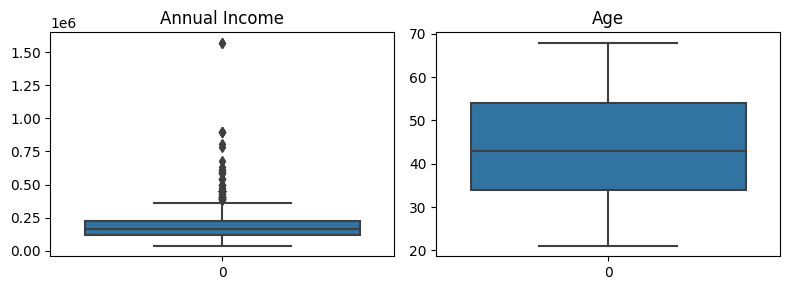

In [27]:
#Checking for all the outliers for numerical variables
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,3))

#Boxplot for 'annual_income'
sns.boxplot(data=df3['annual_income'], ax=axes[0])
axes[0].set_title('Annual Income')

#Boxplot for 'age'
sns.boxplot(data=df3['age'], ax=axes[1])
axes[1].set_title('Age')
plt.tight_layout()
plt.show()


In the annual_income column has  Outliers are present which makes the Data skewed so the null values are replaced with Median 

In [28]:
df3['annual_income'].fillna(df3['annual_income'].median(),inplace=True)
df3['age'].fillna(round(df3['age'].mean(),0),inplace=True)

In the dataset the columns have wrong data type example:age as float , coverted into int 


In [29]:
df3['age']=df3['age'].astype(int)

In [30]:
df3.isnull().sum()

ind_id               0
gender               0
car_owner            0
propert_owner        0
children             0
annual_income        0
type_income          0
education            0
marital_status       0
housing_type         0
age                  0
employment status    0
mobile_phone         0
work_phone           0
phone                0
email_id             0
family_members       0
status               0
dtype: int64

In [31]:
# Export to excel (csv) format
df3.to_csv('credit_card.csv', index=False)

### Handling the Outliers

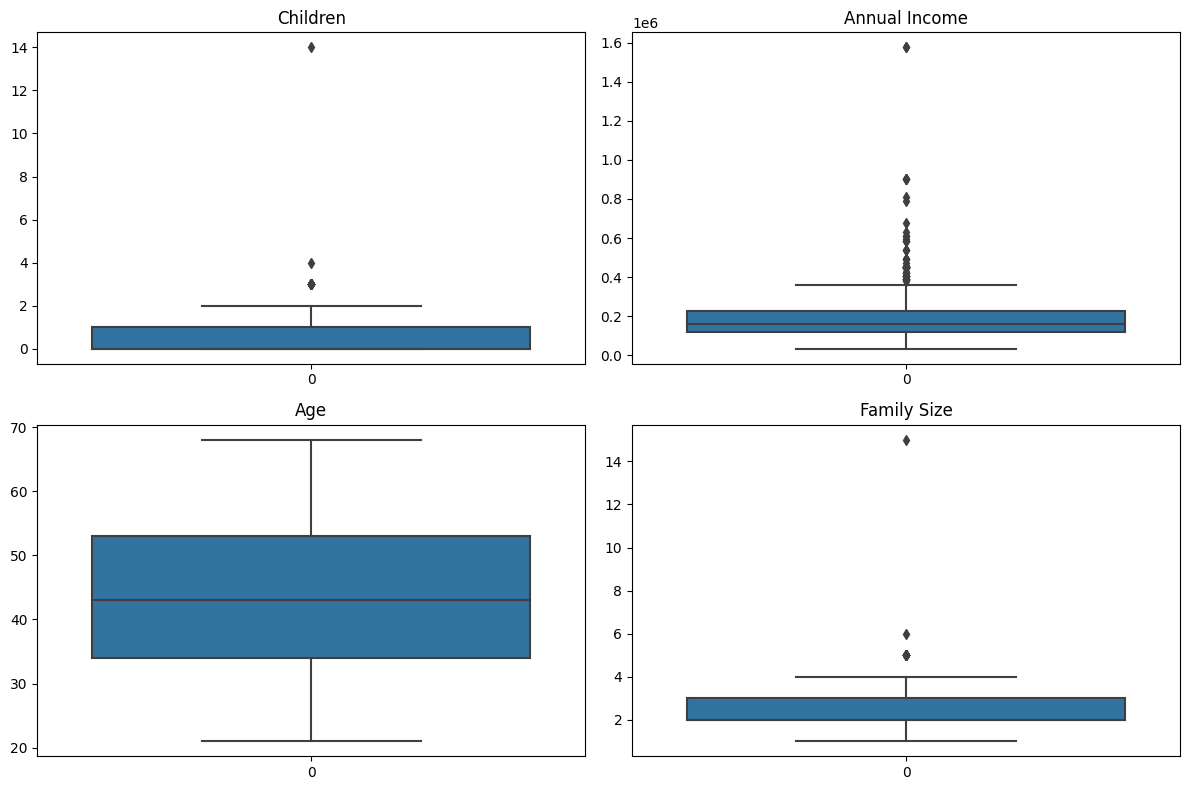

In [32]:
#Checking for all the outliers for  variable
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

#Boxplot for 'children'
sns.boxplot(data=df3['children'], ax=axes[0, 0])
axes[0, 0].set_title('Children')

#Boxplot for 'annual_income'
sns.boxplot(data=df3['annual_income'], ax=axes[0, 1])
axes[0, 1].set_title('Annual Income')

#Boxplot for 'age'
sns.boxplot(data=df3['age'], ax=axes[1, 0])
axes[1, 0].set_title('Age')

#Boxplot for 'family_members'
sns.boxplot(data=df3['family_members'], ax=axes[1, 1])
axes[1, 1].set_title('Family Size')

plt.tight_layout()
plt.show()

In the dataset the columns contails the outlier in Childern,Annual income,Family size

#### Handling the Outliers 

In [33]:
for i in ['children','annual_income','family_members']:
    q1 = np.percentile(df3[i], 25, interpolation='midpoint')
    q3 = np.percentile(df3[i], 75, interpolation='midpoint')
    iqr = q3 - q1
    ll = q1 - 1.5 * iqr #lower limit
    up = q3 + 1.5 * iqr #upper limit
    df3[i] = df3[i].clip(lower=ll, upper=up)

In [34]:
df3['children']=df3['children'].astype(int)
df3['family_members']=df3['family_members'].astype(int)

Removed all outliers from the "Children," "Family Size," and "Annual Income" columns from the  dataset.

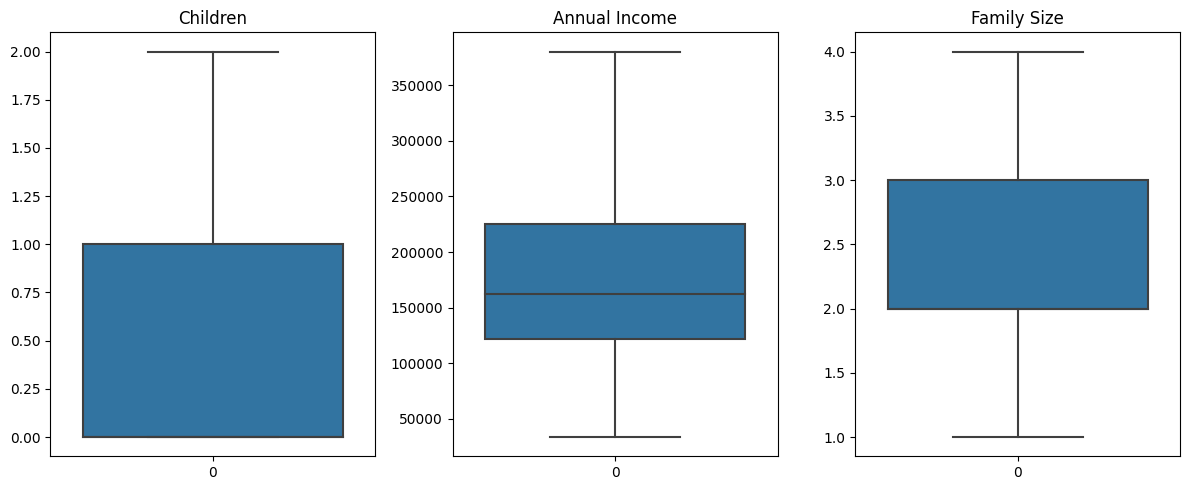

In [35]:
#Checking for all the outliers for variable
fig,axes = plt.subplots(nrows=1, ncols=3, figsize=(12,5))

#Boxplot for 'children'
sns.boxplot(data=df3['children'], ax=axes[0])
axes[ 0].set_title('Children')

#Boxplot for 'annual_income'
sns.boxplot(data=df3['annual_income'], ax=axes[1])
axes[1].set_title('Annual Income')

#Boxplot for 'family_members'
sns.boxplot(data=df3['family_members'], ax=axes[2])
axes[2].set_title('Family Size')

plt.tight_layout()
plt.show()

From above boxplot, it's evident that all outliers have been successfully eliminated.  
 The dataset  now is  ready for analysis.

In [36]:
df3.columns

Index(['ind_id', 'gender', 'car_owner', 'propert_owner', 'children',
       'annual_income', 'type_income', 'education', 'marital_status',
       'housing_type', 'age', 'employment status', 'mobile_phone',
       'work_phone', 'phone', 'email_id', 'family_members', 'status'],
      dtype='object')

#### "Some columns in dataset are uniques values for every row so that columns not used for prediction "

In [37]:
df3.drop(columns={'work_phone','phone','email_id','mobile_phone','ind_id'},inplace=True)

In [38]:
print(categorical)
print("Number of categorical columns: ", len(categorical))
print()
print(numerical)
print("Number of numerical columns: ", len(numerical))

['gender', 'car_owner', 'propert_owner', 'type_income', 'education', 'marital_status', 'housing_type', 'employment status']
Number of categorical columns:  8

['ind_id', 'children', 'annual_income', 'age', 'mobile_phone', 'work_phone', 'phone', 'email_id', 'family_members', 'status']
Number of numerical columns:  10


In [39]:
for i in categorical:
    print(df3[i].value_counts())
    print('sub categorical values',df3[i].unique())
    print("---------------------")

gender
F    973
M    568
Name: count, dtype: int64
sub categorical values ['M' 'F']
---------------------
car_owner
N    922
Y    619
Name: count, dtype: int64
sub categorical values ['Y' 'N']
---------------------
propert_owner
Y    1007
N     534
Name: count, dtype: int64
sub categorical values ['Y' 'N']
---------------------
type_income
Working                 795
Commercial associate    364
Pensioner               267
State servant           115
Name: count, dtype: int64
sub categorical values ['Pensioner' 'Commercial associate' 'Working' 'State servant']
---------------------
education
secondary education    1029
Higher education        421
Incomplete higher        68
Lower secondary          21
Academic degree           2
Name: count, dtype: int64
sub categorical values ['Higher education' 'secondary education' 'Lower secondary'
 'Incomplete higher' 'Academic degree']
---------------------
marital_status
Married      1145
unmarried     396
Name: count, dtype: int64
sub categorica

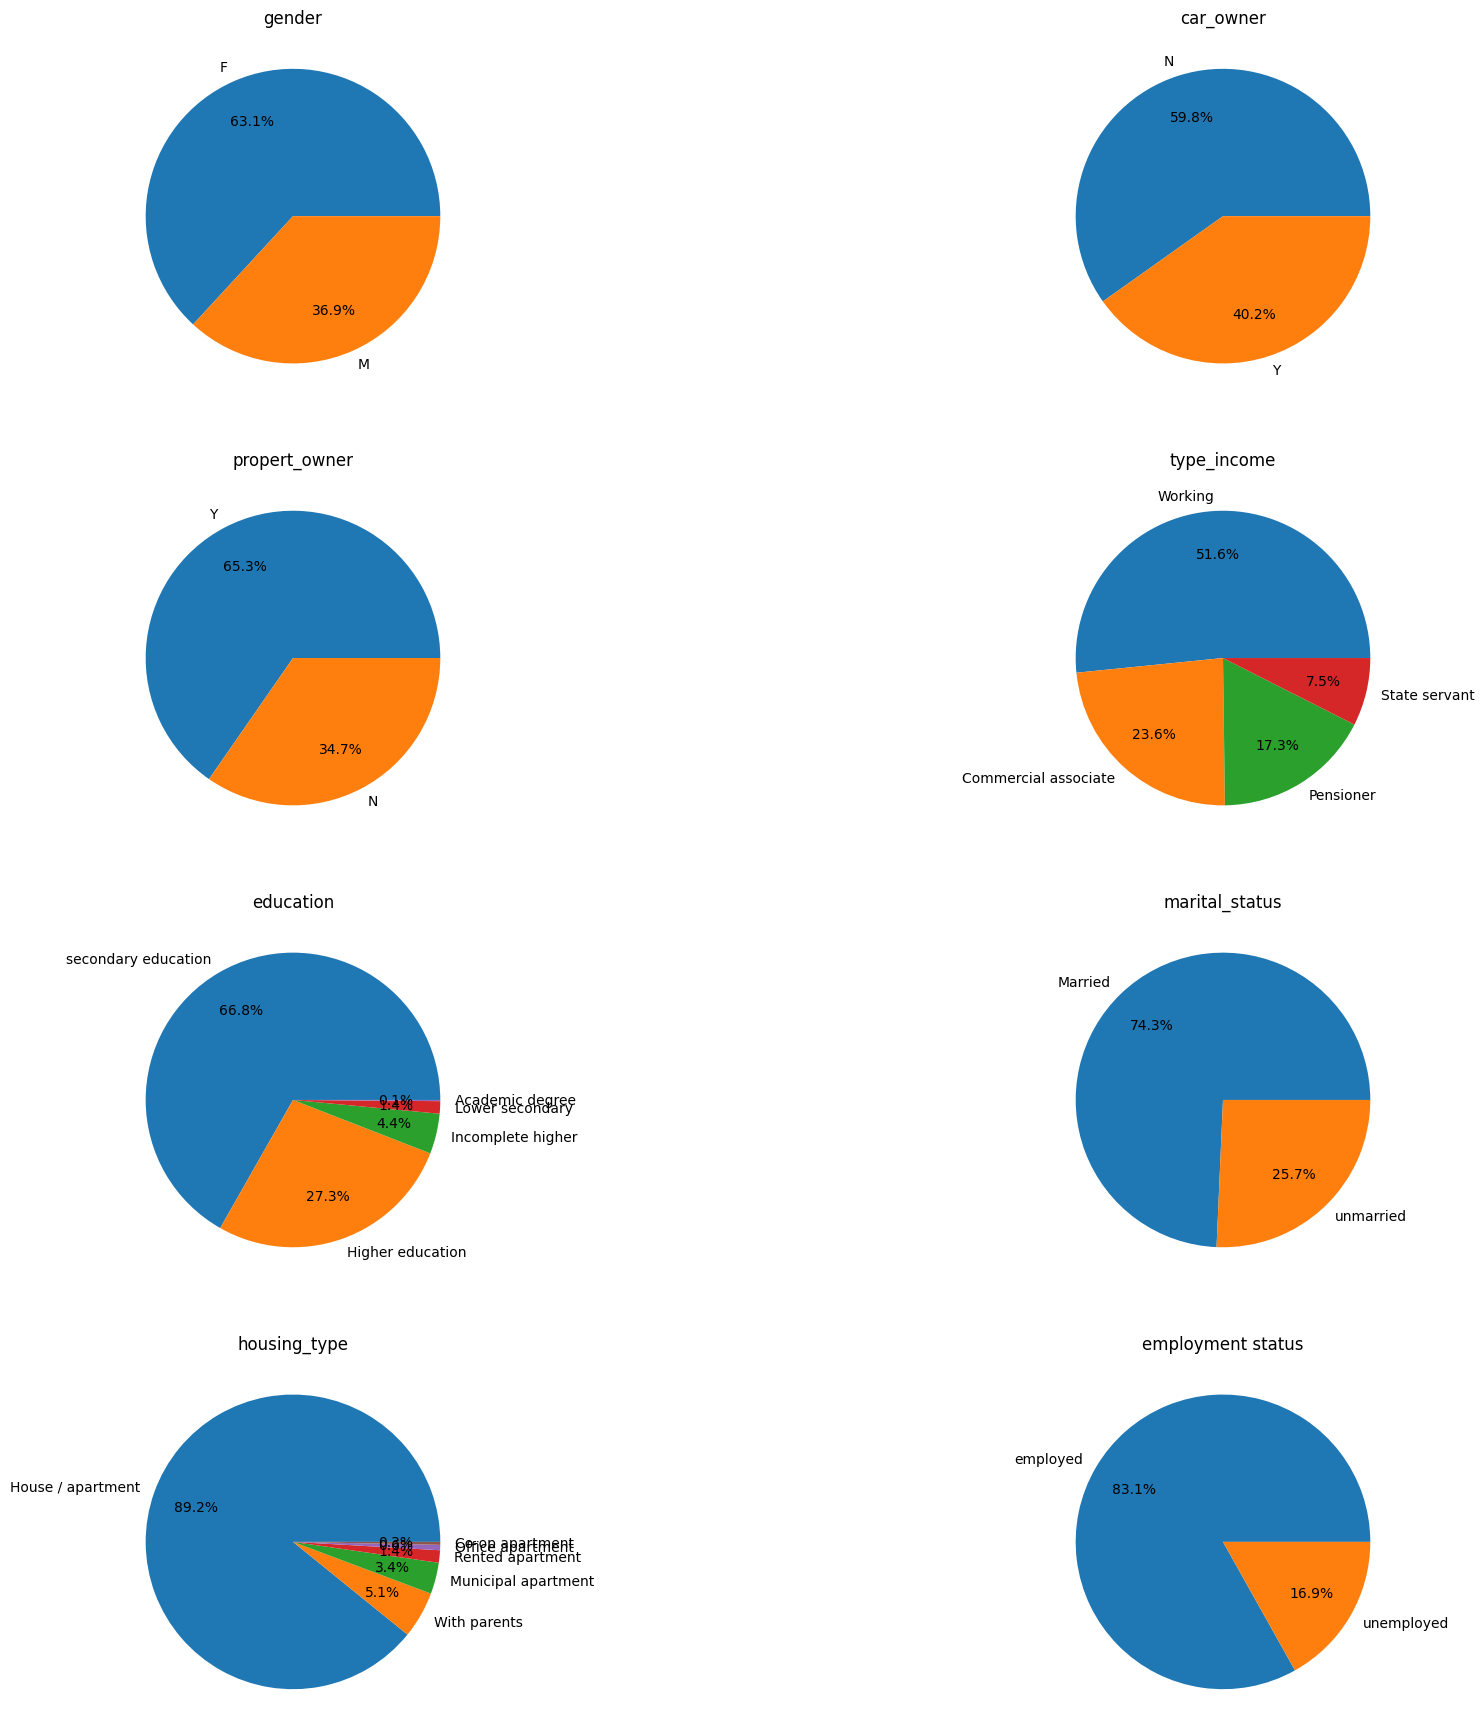

In [40]:
import matplotlib.pyplot as plt
import pandas as pd

# List of categorical columns
categorical_columns = categorical

# Calculate the number of rows and columns for subplots
num_columns =4 # Number of columns in the subplot grid
num_rows = (len(categorical_columns) + num_columns -1) // num_columns  # Calculate the number of rows needed

# Create a figure and a grid of subplots
fig, axs = plt.subplots(num_columns, num_rows, figsize=(22,22))  # You can adjust the figsize as needed

# Flatten the axs array if num_rows > 1
axs = axs.flatten() if num_rows > 1 else [axs]

# Iterate through categorical columns and plot pie charts in subplots
for i, column in enumerate(categorical_columns):
    counts = df3[column].value_counts()
    
    labels = counts.index
    

    # Create a pie chart in the current subplot
    axs[i].pie(counts.values, labels=labels, pctdistance=0.7, autopct='%1.1f%%')
    axs[i].set_title(column)
    


plt.show()


In the above pieplots , we got the understanding of the categories in the columns and there percentage.


In [41]:
percent_cat=[df3[i].value_counts() for i in categorical ]

for i in range(len(percent_cat)):
    print(percent_cat[i]/percent_cat[i].sum()*100)
    print('--------------------------------------')
    print('--------------------------------------')
df3['status'].value_counts()/df3['status'].value_counts().sum()*100

gender
F    63.140818
M    36.859182
Name: count, dtype: float64
--------------------------------------
--------------------------------------
car_owner
N    59.831278
Y    40.168722
Name: count, dtype: float64
--------------------------------------
--------------------------------------
propert_owner
Y    65.347177
N    34.652823
Name: count, dtype: float64
--------------------------------------
--------------------------------------
type_income
Working                 51.589877
Commercial associate    23.621025
Pensioner               17.326411
State servant            7.462687
Name: count, dtype: float64
--------------------------------------
--------------------------------------
education
secondary education    66.774822
Higher education       27.319922
Incomplete higher       4.412719
Lower secondary         1.362751
Academic degree         0.129786
Name: count, dtype: float64
--------------------------------------
--------------------------------------
marital_status
Married    

status
1    88.968202
0    11.031798
Name: count, dtype: float64

In the dataset status column is credit approval column 1 is approved and 0 is rejected , 88.9% candidates has been approved and only 11.03% is rejected .

It's generally recommended to avoid using the gender column. This is because gender is not typically a strong predictor of creditworthiness or payment behavior.

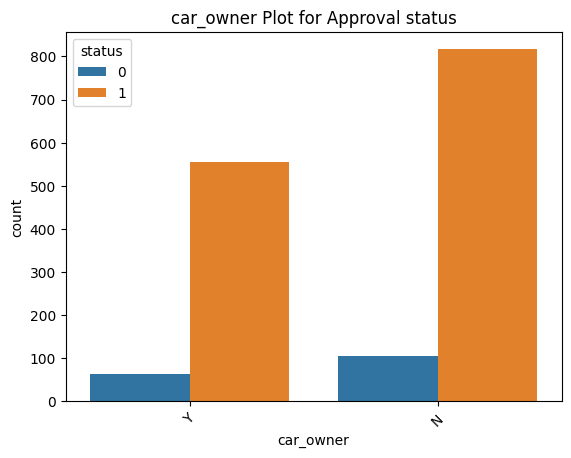

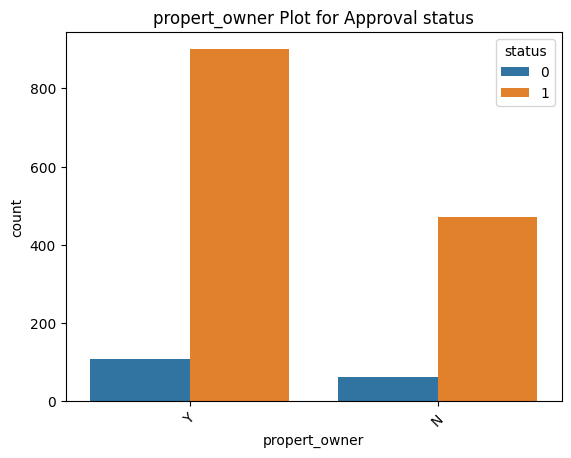

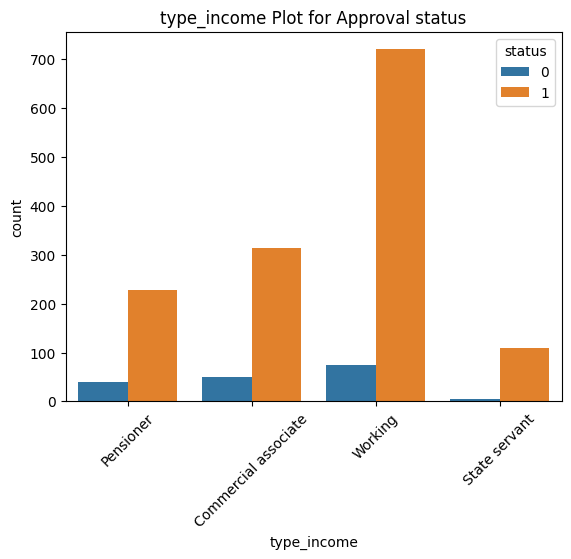

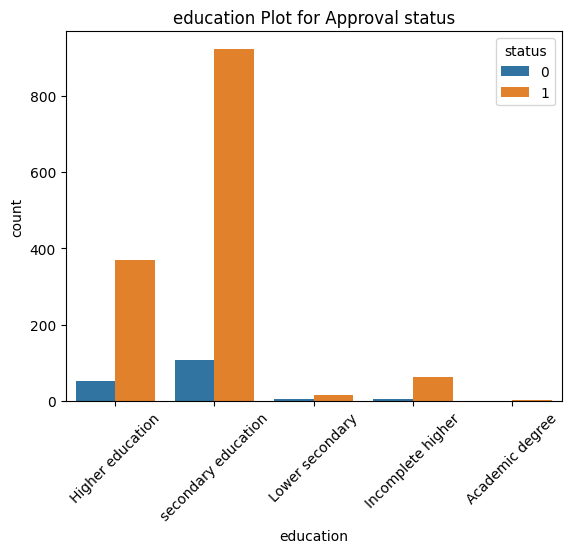

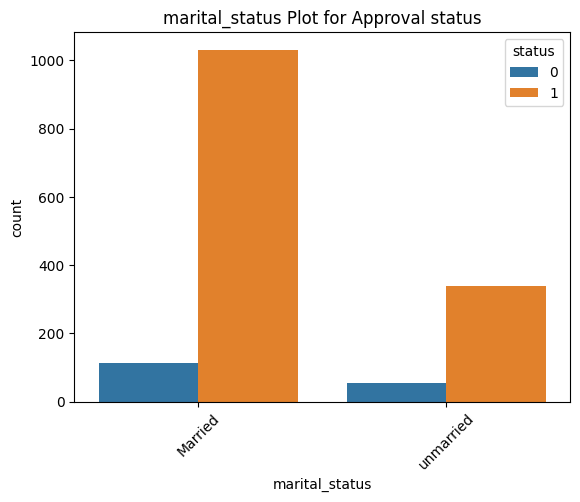

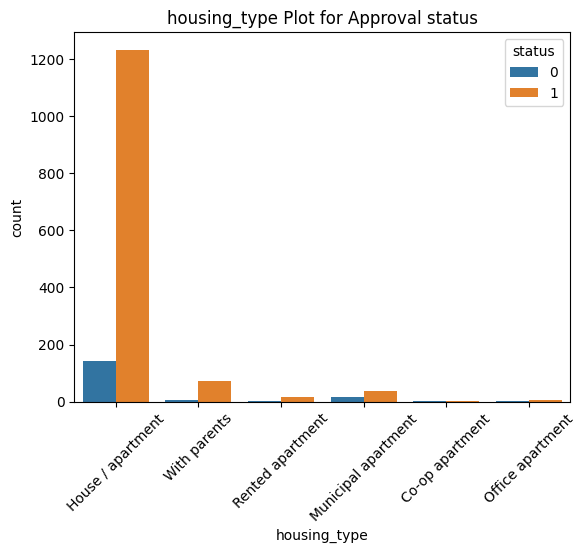

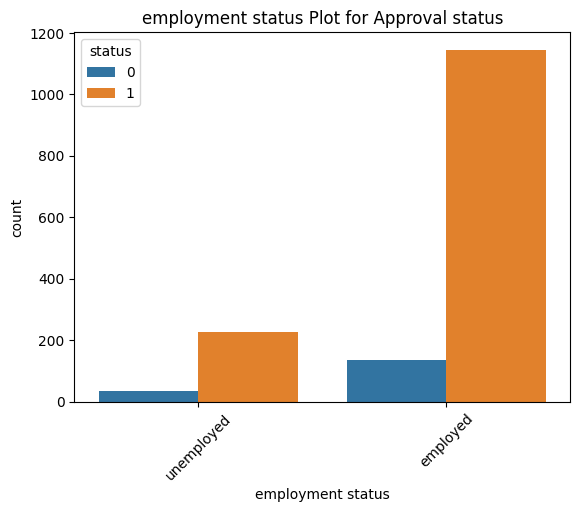

In [42]:
cat=[i for i in categorical if i!='gender'] 
hue_var = 'status'  # The variable you want to use as the hue
for i in cat:
    plt.figure()  # Create a new figure for each count plot
    sns.countplot(data=df3, x=i, hue=hue_var)
    plt.title(f'{i} Plot for Approval status')
    plt.xticks(rotation=45)  
    plt.show()


In the dataset , By means of the count plot we got the some analysis
> 1. Candidate who owns a car or not , does't not effect much on approval of credit. 
> 2. Approval of the credit is makes much diffrence who owns properties. 
> 3. Working professional has largest rate of approval, next commerial associates remaining are much less compare two both .
> 4. Candidates who done secondary education has very high has of approval.
> 5. Married candidates has very high rate of credit approval than unmarried candidates.
> 6. It is evident that person who lived in housing apparment has high rate of credit approval than any other housing type.  
> 7.  Employed applicants have the highest credit card approval rate,Surprisingly, some unemployed applicants with other income sources like pensioners or self employed also received approvals.

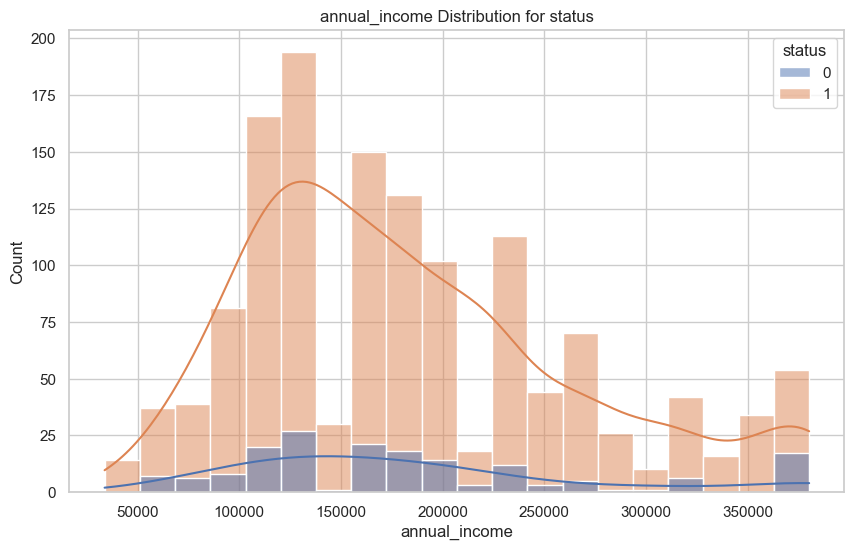

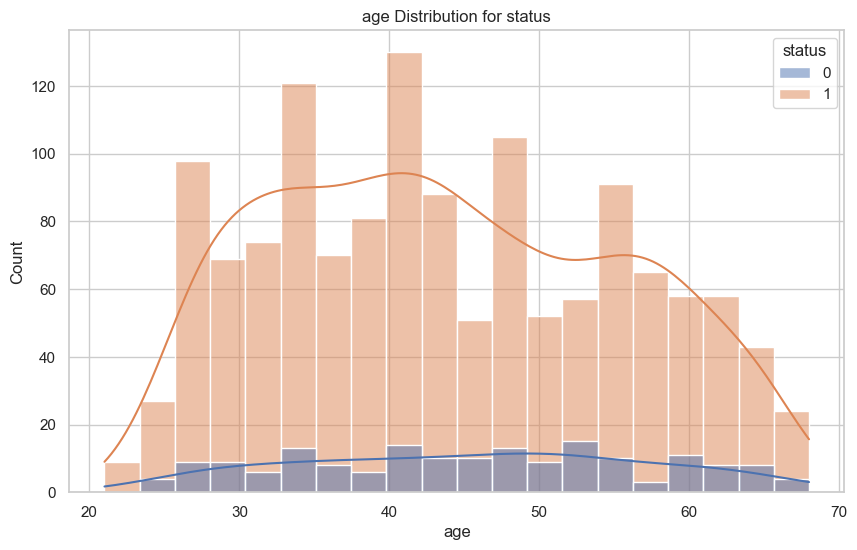

In [43]:
continuous=[i for i in df3.columns if df3[i].dtype!='O' and (df3[i].nunique()>10)]

for col in continuous:
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))  # Optional: Set the figure size
    

    sns.histplot(data=df3, x=col, bins=20,hue='status',kde=True)  # You can adjust the number of bins
    
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'{col} Distribution for status')
    plt.show()


In the above graphs , we can see that 

1. From above , candidates who earns more than 1 lakhs or nearly has high rate of approval. 
2. Majority of approval rates are from the Age (25-60)

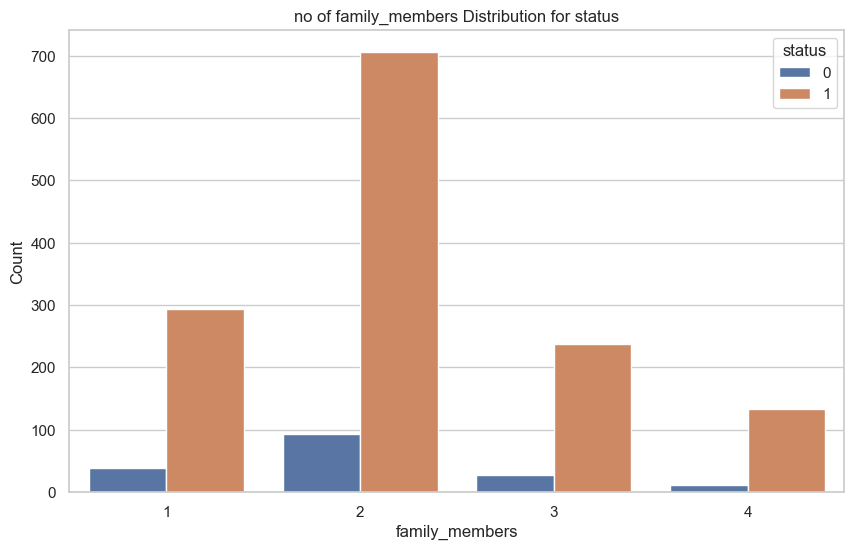

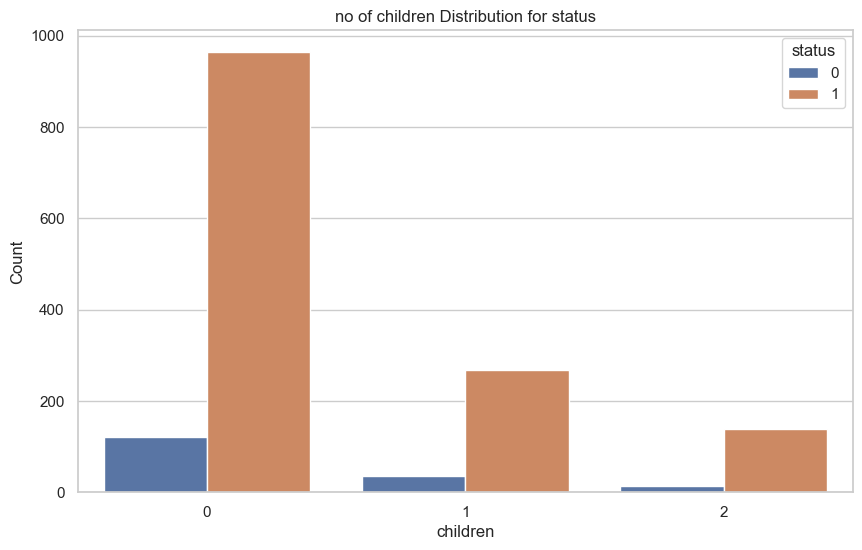

In [44]:

for col in ['family_members','children']:
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))  # Optional: Set the figure size
    

    sns.countplot(data=df3, x=col,hue='status')  # You can adjust the number of bins
    
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'no of {col} Distribution for status')
    plt.show()


In the above graphs of columns family size and childrens 
> Family members with size 2 has very high approval rate.    
> Children with size 0 has very high approval rate. 

From above two plots we can understand that family size 2 and children 0 has very high approval rate 

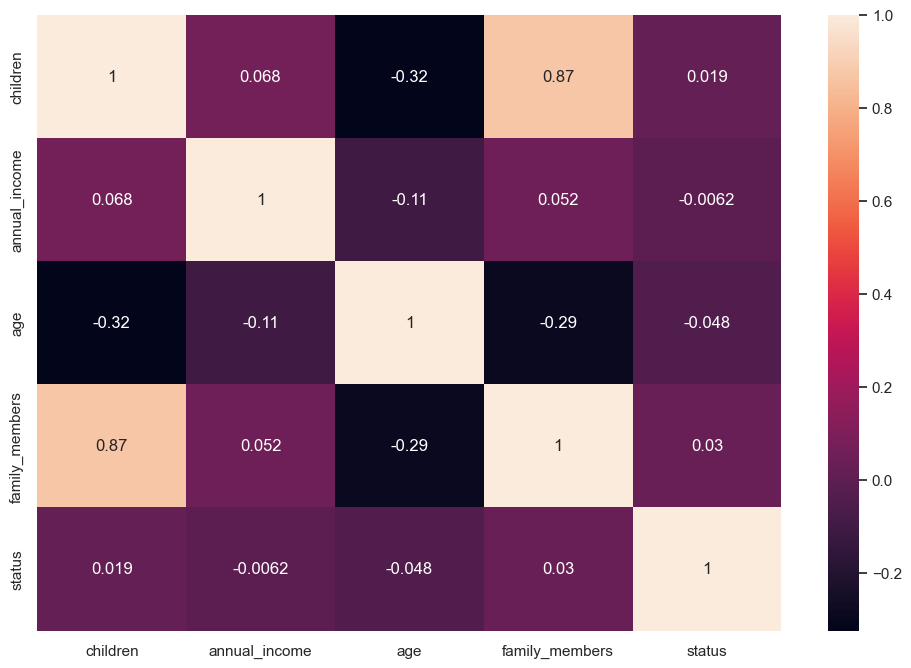

In [45]:
num_col = df3.select_dtypes(exclude = object)
plt.figure(figsize=(12,8))
sns.heatmap(num_col.corr(), annot=True)
plt.show()

From the above Heatmap we can clearly see that family members and childers has very high correlation.   

In [46]:
X=df3.iloc[:,:-1] #split the data into X and y variables 
y=df3.iloc[:,-1]

#### Encoding the categorical columns 

In [47]:
X=pd.get_dummies(X,columns=categorical,drop_first=True).astype(int)

In [48]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1541 entries, 0 to 1547
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   children                          1541 non-null   int32
 1   annual_income                     1541 non-null   int32
 2   age                               1541 non-null   int32
 3   family_members                    1541 non-null   int32
 4   gender_M                          1541 non-null   int32
 5   car_owner_Y                       1541 non-null   int32
 6   propert_owner_Y                   1541 non-null   int32
 7   type_income_Pensioner             1541 non-null   int32
 8   type_income_State servant         1541 non-null   int32
 9   type_income_Working               1541 non-null   int32
 10  education_Higher education        1541 non-null   int32
 11  education_Incomplete higher       1541 non-null   int32
 12  education_Lower secondary         1541 

### Dealing with skewed data

In [49]:
print('Age column ',X['age'].skew())
print('annual income column ',X['annual_income'].skew())

Age column  0.16792728310760424
annual income column  0.8044691805254205


From the above , we can see  that annual income column is positively  skewed 

In [50]:
# Apply a log transformation
log= np.log(X['annual_income'])
log.skew()

-0.19935530536552445

In [51]:
sqrt = X['annual_income']**(1/6)
sqrt.skew()

-0.0019053540888695803

In [52]:
X['annual_income']=sqrt

As the data is right skewed so we  Apply a log transformation and square root transformation to reduce a skewness.  
For above two methods the square root transfromation is works well so we use this to transform annual income column .

<Axes: xlabel='annual_income', ylabel='Count'>

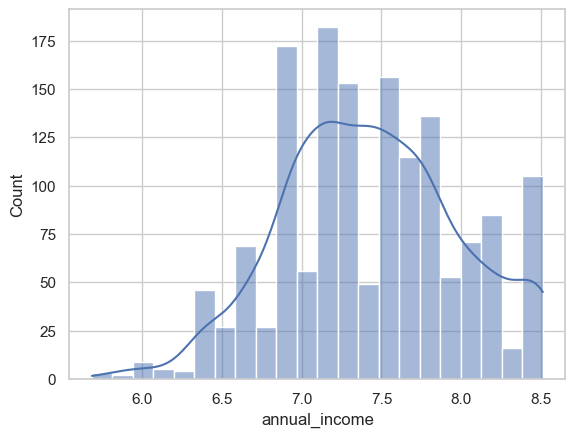

In [53]:
sns.histplot(data=X,x='annual_income',kde=True)

In [54]:
X.head()

,children,annual_income,age,family_members,gender_M,car_owner_Y,propert_owner_Y,type_income_Pensioner,type_income_State servant,type_income_Working,...,education_Incomplete higher,education_Lower secondary,education_secondary education,marital_status_unmarried,housing_type_House / apartment,housing_type_Municipal apartment,housing_type_Office apartment,housing_type_Rented apartment,housing_type_With parents,employment status_unemployed
0,0,7.514131,51,2,1,1,1,1,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,8.248692,37,2,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,8.248692,44,2,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,7.383334,37,2,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,8.248692,37,2,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


## Feature Scaling

### Balancing the dataset 

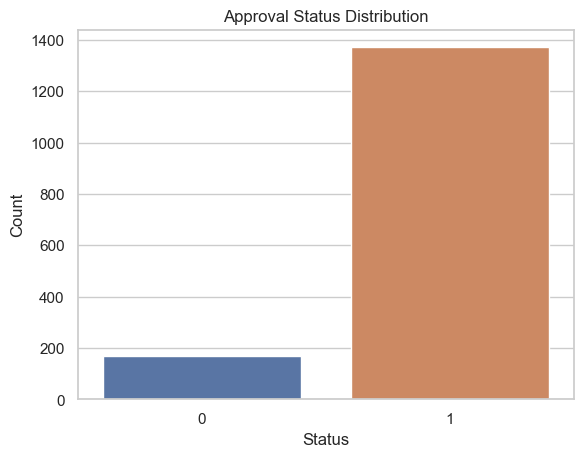

status
1    88.968202
0    11.031798
Name: count, dtype: float64


In [55]:
# Count the occurrences of each class
class_distributions = y.value_counts()
# Visualize the class distribution
sns.barplot(x=class_distributions.index, y=class_distributions.values)
plt.title('Approval Status Distribution')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()
print(y.value_counts()/y.value_counts().sum()*100)

The output feature is imbalance  with percentage of 88.9% approve and 11.03% not approved

In [56]:
# Random Oversampling
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler(sampling_strategy='auto')
X_resampled, y_resampled = oversampler.fit_resample(X, y)

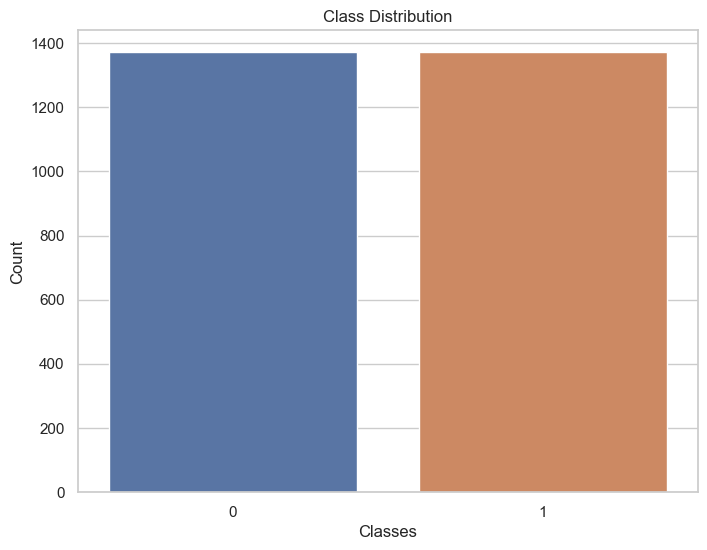

In [57]:
# Count the occurrences of each class
class_distribution = y_resampled.value_counts()
# Visualize the class distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=class_distribution.index, y=class_distribution.values)
plt.title('Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.show()


###  Train and Test Split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state = 15)

In [59]:
print(X_train.shape)
print(X_test.shape)

(2193, 21)
(549, 21)


In [60]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train.iloc[:,:] = sc.fit_transform(X_train.iloc[:,:])

X_test.iloc[:,:] = sc.transform(X_test.iloc[:,:])

Above code helps to standardize the values in columns to get good accuracy in Machine learning algorithm 

## Now to build the Machine learning Models 

### Logistic Regression

In [61]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)
y_pred_test = logistic.predict(X_test)
y_pred_train = logistic.predict(X_train)

In [62]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.60      0.54      0.57       264
           1       0.61      0.67      0.64       285

    accuracy                           0.61       549
   macro avg       0.61      0.60      0.60       549
weighted avg       0.61      0.61      0.60       549



In [63]:
print("Train accuracy score",round(accuracy_score(y_train, y_pred_train)*100, 2))
print("Test accuracy score",round(accuracy_score(y_test, y_pred_test)*100, 2))
print('cross validation score',cross_val_score(logistic,X,y,scoring='accuracy').mean()*100)

Train accuracy score 65.34
Test accuracy score 60.66
cross validation score 88.90324885470517


In [64]:
lr=round(accuracy_score(y_test, y_pred_test)*100, 2)

Logistic Regression model we can predict 60.66% accurately. The cross validation score is 88.90

### DecisionTree

In [65]:
decision = DecisionTreeClassifier(random_state=15)

In [66]:
decision.fit(X_train, y_train)
y_pred_dt_test = decision.predict(X_test)
y_pred_dt_train = decision.predict(X_train)
class_report_dt = classification_report(y_pred_dt_test, y_test)
print(class_report_dt)

              precision    recall  f1-score   support

           0       1.00      0.88      0.93       301
           1       0.87      1.00      0.93       248

    accuracy                           0.93       549
   macro avg       0.94      0.94      0.93       549
weighted avg       0.94      0.93      0.93       549



In [67]:
print("Train accuracy score",round(accuracy_score(y_train, y_pred_dt_train)*100, 2))
print("Test accuracy score",round(accuracy_score(y_test, y_pred_dt_test)*100, 2))
print('cross validation score',cross_val_score(decision,X,y,scoring='accuracy').mean()*100)

Train accuracy score 99.45
Test accuracy score 93.26
cross validation score 81.89530534190726


In [68]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': list(range(1,55)), 
    'criterion': ['gini', 'entropy']}

# Create the GridSearchCV object
grid_search_dt = GridSearchCV(decision, param_grid, cv=5)

grid_search_dt.fit(X_train, y_train)

# Get the best hyperparameters and the best model
best_params_dt = grid_search_dt.best_params_
best_model_dt = grid_search_dt.best_estimator_
print(best_params_dt)
print(best_model_dt)

{'criterion': 'gini', 'max_depth': 25}
DecisionTreeClassifier(max_depth=25, random_state=15)


In [69]:
decision_best = DecisionTreeClassifier(criterion='gini', max_depth=22)
decision_best.fit(X_train, y_train)
#Predict the response for test dataset
y_pred_best_dt_test = decision_best.predict(X_test)
y_pred_best_dt_train = decision_best.predict(X_train)

class_report_dt_best = classification_report(y_test, y_pred_best_dt_test)
print(class_report_dt_best)

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       264
           1       1.00      0.87      0.93       285

    accuracy                           0.93       549
   macro avg       0.94      0.93      0.93       549
weighted avg       0.94      0.93      0.93       549



In [70]:
print("Train accuracy score",round(accuracy_score(y_train, y_pred_best_dt_train)*100, 2))
print("Test accuracy score",round(accuracy_score(y_test, y_pred_best_dt_test)*100, 2))
print('cross validation score',cross_val_score(decision_best,X,y,scoring='accuracy').mean()*100)

Train accuracy score 99.45
Test accuracy score 93.08
cross validation score 81.83079056865465


In [71]:
dt=round(accuracy_score(y_test, y_pred_best_dt_test)*100, 2)

By Decision Tree model we can predict with  accuracy of 93%, after tuning we are getting 93.08% accuracy

### Random Forest 

In [72]:
random_forest = RandomForestClassifier(random_state = 15)

In [73]:
random_forest.fit(X_train, y_train)

y_pred_rf_test = random_forest.predict(X_test)
y_pred_rf_train = random_forest.predict(X_train)
class_report_rf = classification_report(y_pred_rf_test, y_test)
print(class_report_rf)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       275
           1       0.96      1.00      0.98       274

    accuracy                           0.98       549
   macro avg       0.98      0.98      0.98       549
weighted avg       0.98      0.98      0.98       549



In [74]:
print("Train accuracy score",round(accuracy_score(y_train, y_pred_rf_train)*100, 2))
print("Test accuracy score",round(accuracy_score(y_test, y_pred_rf_test)*100, 2))
print('cross validation score',cross_val_score(random_forest,X,y,scoring='accuracy').mean()*100)

Train accuracy score 99.45
Test accuracy score 98.0
cross validation score 88.12465851300803


In [75]:
# Define the hyperparameter grid to search for random forest
param_grid_rf = {
    'n_estimators': list(range(1,50)), 
    'max_depth': list(range(1,30)),
    'criterion': ['gini', 'entropy']}

grid_search_rf = GridSearchCV(random_forest, param_grid_rf, cv=5, scoring='f1')

grid_search_rf.fit(X_train, y_train)

# Get the best hyperparameters and the best model
best_params_rf = grid_search_rf.best_params_
best_model_rf = grid_search_rf.best_estimator_
print(best_params_rf)
print(best_model_rf)

{'criterion': 'entropy', 'max_depth': 22, 'n_estimators': 37}
RandomForestClassifier(criterion='entropy', max_depth=22, n_estimators=37,
                       random_state=15)


In [86]:
random_forest_best = RandomForestClassifier(criterion = 'entropy',max_depth=22, n_estimators=37, random_state=15)
random_forest_best.fit(X_train, y_train)
#Predict the response for test dataset
y_pred_best_rf_test =random_forest_best.predict(X_test)
y_pred_best_rf_train =random_forest_best.predict(X_train)
class_report_rf_best = classification_report(y_test, y_pred_best_rf_test)
print(class_report_rf_best)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       264
           1       1.00      0.94      0.97       285

    accuracy                           0.97       549
   macro avg       0.97      0.97      0.97       549
weighted avg       0.97      0.97      0.97       549



In [87]:
print("Train accuracy score",round(accuracy_score(y_train, y_pred_best_rf_train)*100, 2))
print("Test accuracy score",round(accuracy_score(y_test, y_pred_best_rf_test)*100, 2))
print('cross validation score',cross_val_score(random_forest_best,X,y,scoring='accuracy').mean()*100)

Train accuracy score 99.45
Test accuracy score 97.09
cross validation score 88.05972344807296


In [78]:
rf=round(accuracy_score(y_test, y_pred_best_rf_test)*100, 2)

By Random Forest model we can predict with  accuracy of 98%, after tuning we are getting 97% accuracy

### KNN

In [79]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=4)
knn_classifier.fit(X_train, y_train)

y_pred_knn_test= knn_classifier.predict(X_test)
y_pred_knn_train= knn_classifier.predict(X_train)
class_report_knn = classification_report(y_pred_knn_test, y_test)
print(class_report_knn)

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       322
           1       0.80      1.00      0.89       227

    accuracy                           0.89       549
   macro avg       0.90      0.91      0.89       549
weighted avg       0.92      0.89      0.90       549



In [90]:
from sklearn.model_selection import cross_val_score
print("Train accuracy score",round(accuracy_score(y_train, y_pred_knn_train)*100, 2))
print("Test accuracy score",round(accuracy_score(y_test, y_pred_knn_test)*100, 2))
print('cross validation score',cross_val_score(knn_classifier,X,y,scoring='accuracy').mean()*100)

Train accuracy score 90.97
Test accuracy score 89.44
cross validation score 83.19211532803766


In [81]:
# Define the hyperparameter grid to search for random forest
param_grid_knn = {
    'n_neighbors': list(range(1,30))}

grid_search_rf = GridSearchCV(knn_classifier, param_grid_knn, cv=5, scoring='f1')

grid_search_rf.fit(X_train, y_train)

# Get the best hyperparameters and the best model
best_params_rf = grid_search_rf.best_params_
best_model_rf = grid_search_rf.best_estimator_
print(best_params_rf)
print(best_model_rf)

{'n_neighbors': 1}
KNeighborsClassifier(n_neighbors=1)


In [88]:
knn_classifier_best = KNeighborsClassifier(n_neighbors=1)
knn_classifier_best.fit(X_train, y_train)

y_pred_best_knn_test= knn_classifier.predict(X_test)
y_pred_best_knn_train= knn_classifier.predict(X_train)
class_report_knn = classification_report(y_pred_knn_test, y_test)
print(class_report_knn)

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       322
           1       0.80      1.00      0.89       227

    accuracy                           0.89       549
   macro avg       0.90      0.91      0.89       549
weighted avg       0.92      0.89      0.90       549



In [89]:
print("Train accuracy score",round(accuracy_score(y_train, y_pred_best_knn_train)*100, 2))
print("Test accuracy score",round(accuracy_score(y_test, y_pred_best_knn_test)*100, 2))
print('cross validation score',cross_val_score(knn_classifier_best,X,y,scoring='accuracy').mean()*100)

Train accuracy score 90.97
Test accuracy score 89.44
cross validation score 83.32219560374898


In [84]:
knn=round(accuracy_score(y_test, y_pred_best_knn_test)*100, 2)

By KNN model we can predict with  accuracy of 89%, after tuning we are getting 89% accuracy

## Comparing All Models 

1. By building  four models from give credit card dataset from the prediction of approval.
2. Comparing Four models which model give more prediction accuracy for credit card approval.

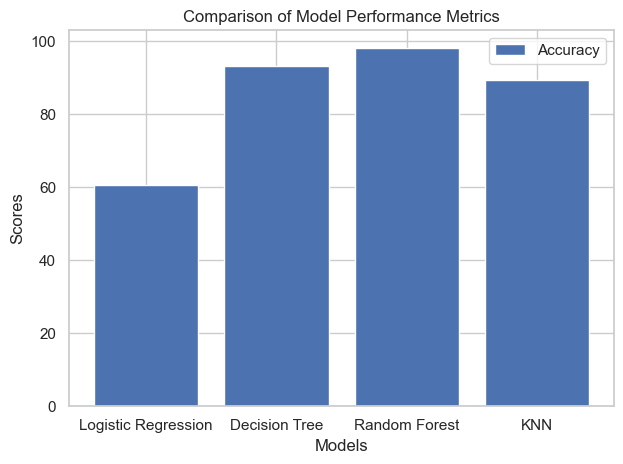

In [85]:
models=['Logistic Regression','Decision Tree','Random Forest','KNN']
accuracy=[lr,dt,rf,knn]
plt.bar(models,accuracy, label='Accuracy')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Comparison of Model Performance Metrics')
plt.legend()
plt.tight_layout()
plt.show()



| Model_Name  | Accuracy Score |
| --------- | ------ |
| Random Forest |97.09  |
| Decision Tree | 93.08 |
| KNN | 89.44 |
| Logistic Regression | 60.66 |

**Conclusion**

For Credit Card Approval dataset has build 4 models, **Logistic Regression , Decision Tree , Random Forest , KNN** by comapring with confusion matrix , these models are build to maximize the accuracy for  prediction for dataset.

From all the models **Random Forest model** is best by means of (Accuray , Precision , F1 , Recall Score)  which provides greater accuray for  predicting  the credit card worthiness.